## Gaussians

In class, we derived (or will derive) the posterior and predictive distributions for a data point generated from a Gaussian-Gaussian model: having a Gaussian likelihood with unknown mean and known variance, and with a Gaussian prior on the mean of the likelihood with known mean and known variance. This model can be written in generative process notation\footnote{I try to use the following convention for variables: scalar variables are lowercase and italics (e.g., $x$), indices tend to be $n$, $t$, $c$ or $k$, the largest index is uppercase (e.g., $N$), vector variables are bold and lowercase (e.g., ${\bf x}$), and matrix variables are bold and uppercase (e.g., ${\bf X}$).} as:

$\mu \sim {\rm N}(\mu_0, \sigma^2_0)$
$x_1,\dotsc, x_N | \mu, \sigma_x^2 \overset{iid}{\sim} {\rm N}(\mu, \sigma^2_x)$

Remember that $iid$ means {\em independent} and {\em identically distributed} and the generative process notation $x | \mu, \sigma_x^2 \sim {\rm N}(\mu, \sigma_x^2)$ means that given the values of parameters $\mu$ and $\sigma_x^2$, $x$ is normally distributed with mean $\mu$ and variance $\sigma_x^2$. So, this means
$p(x|\mu,\sigma_x^2) = \frac{1}{\sigma_x \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma_x^2}\left(x-\mu \right)^2}$

Note that it is traditional to use a zero subscript for the parameters for a prior distribution. For this model, there is a closed form solution for the posterior probability, $p(\mu | x_1, \dotsc, x_N)$, and predictive probability, $p(x_{N+1} | x_1,\dotsc,x_N)$. Remember that you can always look up these special models whose posterior distribution is the same form as the prior distribution on Wikipedia [Conjugate Prior](https://en.wikipedia.org/wiki/Conjugate_prior). They are

$
\begin{align*}
{\rm Posterior:} & &  \mu & | x_1,\dotsc, x_N \sim {\rm N} \left( \frac{\mu_0 \sigma_0^{-2} + \sigma_x^{-2} \sum_{n=1}^N{x_n}   } {\sigma_0^{-2} + N \sigma_x^{-2} }, \left[ \sigma_0^{-2} + N \sigma_x^{-2} \right]^{-1}  \right)  \\
{\rm Prediction} & & x_{N+1} & | x_1, \dotsc, x_N \sim {\rm N} \left( \frac{ \mu_0 \sigma_0^{-2} + \sigma_x^{-2} \sum_{n=1}^N{x_n}  }{\sigma_0^{-2} + N \sigma_x^{-2} },  \left[ \sigma_0^{-2} + N \sigma_x^{-2} \right]^{-1} + \sigma_x^2 \right)
\end{align*}
$
So, the predictive distribution has the same mean as the posterior distribution, but it has larger variance (it is $\sigma_x^2$ larger). For this problem, use $\mu_0=0$ and $\sigma_0^2 = 1$.  In this problem, we will explore how the number of data points and variance of the likelihood affect the posterior and predictive distributions.


### 1. (a) Prior
To provide a baseline, turn in a plot of the prior distribution. Please make sure your plot captures the ``interesting'' part of the distribution (i.e., the two extrema of the x-axis are the tails and the width and maximum of the bell are clearly visible). 

In [13]:
import seaborn as sb # plotting software built on matplotlib. It's just nicer.
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [9]:
# # Commented out because scipy.stats.norm.pdf() does the exact same thing
# # return likelihood of drawing sample(s) from a 1D gaussian
# def gaussian_pdf(x, mu=0, var=1):
#     r = (1 / (np.sqrt(var) * np.sqrt(2*np.pi)))* np.exp((-1/(2*var)) * np.square(x-mu))
#     return r

Text(0.5, 0, 'x')

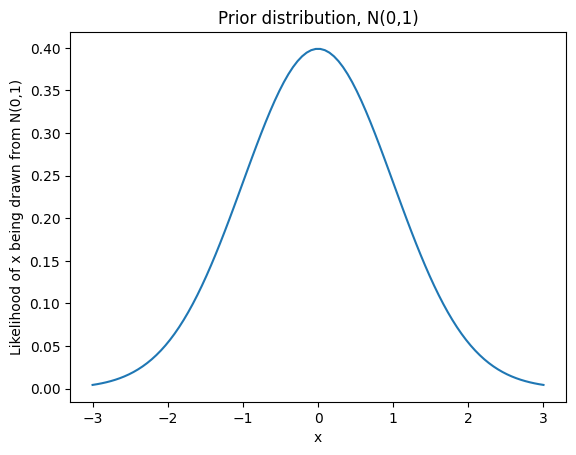

In [19]:
mu_0 = 0
var_0 = 1

x_plot = np.linspace(-3,+3,100)
y_plot = norm.pdf(x_plot, loc=mu_0, scale=var_0)
sb.lineplot(x=x_plot, y=y_plot)
plt.title(f'Prior distribution, N({mu_0},{var_0})')
plt.ylabel(f'Likelihood of x being drawn from N({mu_0},{var_0})')
plt.xlabel('x')

### 1. (b) One Datum update
Calculate and plot the posterior and predictive distributions after observing $x_1=2$ for $\sigma_x^2 = 0.25$ and $\sigma_x^2=4$ (that is 4 different distributions: the posterior and predictive for $\sigma_x^2=0.25$ and the posterior and predictive for $\sigma_x^2=4$). How does changing the variance of the likelihood affect the distributions? Are there any differences? Why?

In [30]:

def get_mean(x, var_x, mu_0, var_0):
    N = len(x)
    var_0_recip, var_x_recip = np.reciprocal((var_0, var_x))
    return (mu_0*var_0_recip + var_x_recip*np.sum(x))/(var_0_recip + N*var_x_recip)

def get_var_posterior(x, var_x, mu_0, var_0):
    N = len(x)
    var_0_recip, var_x_recip = np.reciprocal((var_0, var_x))
    return np.reciprocal(var_0_recip + N*var_x_recip)

def get_var_prediction(x, var_x, mu_0, var_0):
    N = len(x)
    var_0_recip, var_x_recip = np.reciprocal((var_0, var_x))
    return np.reciprocal(var_0_recip + N*var_x_recip) + var_x

# Return the mean and variance from data and from given prior on mu
def get_posterior(x, var_x, mu_0, var_0):
    return (get_mean(x, var_x, mu_0, var_0), get_var_posterior(x, var_x, mu_0, var_0))

# Return the mean and variance from data and from given prior on mu
def get_prediction(x, var_x, mu_0, var_0):
    return (get_mean(x, var_x, mu_0, var_0), get_var_prediction(x, var_x, mu_0, var_0))

'For an x variance of 0.25,'

'The Posterior is distributed according to N(1.6, 0.2)'

'The Prediction is distributed according to N(1.6, 0.45)'

'For an x variance of 4,'

'The Posterior is distributed according to N(0.0, 1)'

'The Prediction is distributed according to N(0.0, 5)'

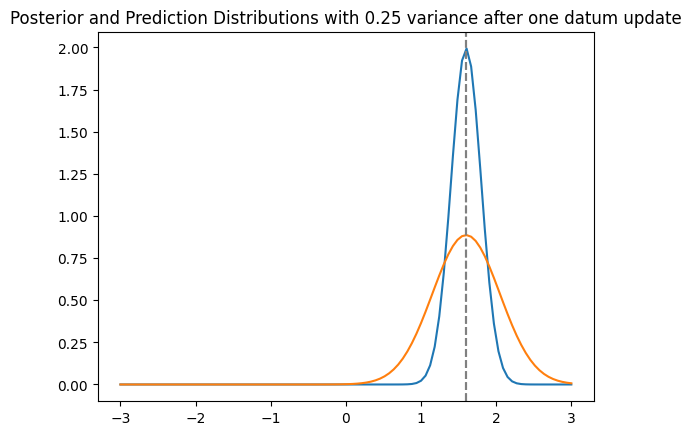

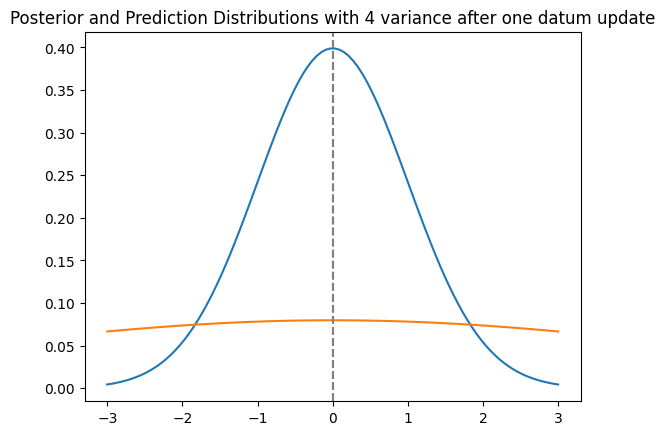

In [34]:
x_plot = np.linspace(-3,+3,100)

x_b = [2]
distributions = [('Posterior', get_posterior), ('Prediction', get_prediction)]
variances = [0.25, 4]
for v in variances:
    plt.figure()
    t = f'Posterior and Prediction Distributions with {v} variance after one datum update'
    plt.title(t)
    display(f'For an x variance of {v},')
    for d, getter in distributions:
        mu_plot, var_plot = getter(x_b, v, mu_0, var_0)
        display(f'The {d} is distributed according to N({mu_plot}, {var_plot})')
        y_plot = norm.pdf(x_plot, loc=mu_plot, scale=var_plot)
        sb.lineplot(x=x_plot, y=y_plot)
        plt.axvline(mu_plot, color='grey', linestyle='--')

### 1. (c) Multiple data update
Calculate and plot the posterior and predictive distributions given $(x_1,\dotsc, x_5) = (2.1, 2.5, 1.4, 2.2, 1.8)$ for $\sigma_x^2 = 0.25$ and $\sigma_x^2 = 4$. How does this  compare to the previous example? Note that the average of the data points is 2, and so both contribute the same average value. For cases that differ, why do they differ then? For those that do not, why don't they differ?


In [ ]:
fill me